In [11]:
from ultralytics import YOLO, solutions
import cv2
import numpy as np
import matplotlib.pyplot as plt
!pip install jupyter
!pip install matplotlib-inline

## Cross line

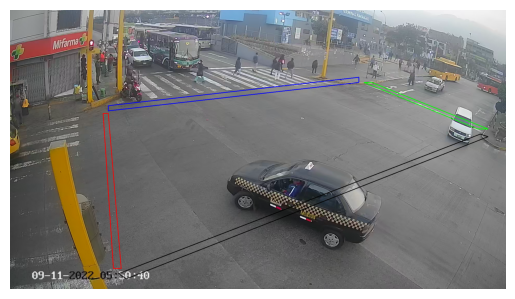

In [12]:
# Capture a frame from the video source (e.g., webcam)
cap = cv2.VideoCapture("../data/video1.mp4")
ret, frame = cap.read()
cap.release()

# Define region points
region1 = np.array([(380, 370), (380, 390),    (1350, 280), (1350, 260)], np.int32) # Blue
region2 = np.array([(1370, 280),(1400, 280),   (1850, 460), (1810, 460)], np.int32) # green
region3 = np.array([(380, 400), (360, 400),    (400, 1000), (430, 1000)], np.int32) # red
region4 = np.array([(420, 1020), (450, 1040),   (1850, 490), (1820, 480)], np.int32) # black
 
# Line thickness of 2 px
thickness = 2
cv2.polylines(frame, [region1], True, (255, 0, 0), thickness)
cv2.polylines(frame, [region2], True, (0, 255, 0), thickness)
cv2.polylines(frame, [region3], True, (0, 0, 255), thickness)
cv2.polylines(frame, [region4], True, (0, 0, 0), thickness)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
plt.axis('off')  # Hide axis
plt.show()

## Tracking

In [23]:
model = YOLO('../models/best.pt')

In [24]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [22]:
#region_points = [(380, 370), (380, 390), (1350, 280), (1350, 260)]
#line_points = [[450, 350], [1250, 280]]

# Init Object Counter
counter = solutions.ObjectCounter(
    view_img=False,
    reg_pts=region1,
    classes_names=model.names,
    draw_tracks=True,
    view_in_counts=False,
    view_out_counts=False,
    line_thickness=1,
    line_width=1

)

Ultralytics Solutions: ✅ {'region': None, 'show_in': True, 'show_out': True, 'colormap': None, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'json_file': None, 'view_img': False, 'reg_pts': array([[ 380,  370],
       [ 380,  390],
       [1350,  280],
       [1350,  260]], dtype=int32), 'classes_names': {0: '1_Auto Privado', 1: '13_Bus', 2: '11_Camioneta rural', 3: '12_Microbus', 4: '4_Mototaxi', 5: '5_Moto lineal', 6: '9_Omnibus Interprovincial', 7: '10_Auto colectivo', 8: '14_Articulado', 9: '2_Cam. PickUp', 10: '3_Taxi', 11: '6_Bicicletas', 12: '7_Scooter', 13: '8_TransportenEscolar Personal', 14: '15_TC_Ligeros', 15: '16_TC Pesados', 16: '17_TC SemiTrailler Trailer', 17: '18_Triciclo', 18: '19_Ambulancia'}, 'draw_tracks': True, 'view_in_counts': False, 'view_out_counts': False, 'line_thickness': 1, 'line_width': 1}


KeyError: 'model'

In [ ]:
counter2 = solutions.ObjectCounter(
    view_img=False,
    reg_pts=region2,
    classes_names=model.names,
    draw_tracks=True,
    view_in_counts=False, 
    view_out_counts=False,
    line_thickness=1,
)

counter3 = solutions.ObjectCounter(
    view_img=False,
    reg_pts=region3,
    classes_names=model.names,
    draw_tracks=True,
    view_in_counts=False, 
    view_out_counts=False,
    line_thickness=1,
)

counter4 = solutions.ObjectCounter(
    view_img=False,
    reg_pts=region4,
    classes_names=model.names,
    draw_tracks=True,
    view_in_counts=False, 
    view_out_counts=False,
    line_thickness=1,
    line_width=1
)

In [ ]:
cap = cv2.VideoCapture("../data/video1.mp4")
ret, frame = cap.read()

## MODEL
tracks = model.track(frame, persist=True, show=False)
frame = counter.start_counting(frame, tracks)
frame = counter2.start_counting(frame, tracks)

count1 = counter.class_wise_count
total1 = {}
for i in count1.keys():
    total1[i] = count1[i]['IN'] + count1[i]['OUT']

count2 = counter2.class_wise_count
total2 = {}
for i in count2.keys():
    total2[i] = count2[i]['IN'] + count2[i]['OUT']

# Unir diccionarios
diccionario_unido = {}

# Recorrer todas las claves únicas de ambos diccionarios
for clave in set(total1.keys()).union(total2.keys()):
    valor1 = total1.get(clave, 0)  # Obtiene el valor del diccionario1 o 0 si no existe
    valor2 = total2.get(clave, 0)  # Obtiene el valor del diccionario2 o 0 si no existe

    if isinstance(valor1, int) and isinstance(valor2, int) and valor1 == 0 and valor2 == 0:
        diccionario_unido[clave] = [0,0]  # Si ambos valores son 0, poner 0 en el diccionario unido
    else:
        diccionario_unido[clave] = [valor1, valor2]  # Combinar los valores en una lista


for i in diccionario_unido.keys():   
    update_row(i, diccionario_unido[i][0], diccionario_unido[i][1], diccionario_unido[i][1]+diccionario_unido[i][0])


if ret:
    # Resize the frame to fit the specified dimensions
    frame = cv2.resize(frame, (FRAME_WIDTH, FRAME_HEIGHT))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(frame)
    imgtk = ImageTk.PhotoImage(image=img)
    label.imgtk = imgtk
    label.configure(image=imgtk)
label.after(10, update_frame)

In [ ]:
# Video writer
cap = cv2.VideoCapture("../data/video1.mp4")

#video_writer = cv2.VideoWriter("object_counting_output.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))
region_points = [(400, 250), (450, 320), (1250, 280), (1000, 220)]

# Init Object Counter
counter = solutions.ObjectCounter(
    view_img=True,
    reg_pts=region_points,
    classes_names=model.names,
    draw_tracks=True,
    line_thickness=2,
)

co = 0
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    tracks = model.track(im0, persist=True, show=False)

    im0 = counter.start_counting(im0, tracks)
    #video_writer.write(im0)
    if co == 20:
        cv2.imwrite('test.jpg',im0)
        cap.release()
        video_writer.release()
        cv2.destroyAllWindows()

    co = co + 1

In [ ]:
model = YOLO("yolo11n.pt")
image = cv.imread('../data/demo.jpg')
results = model(image, classes=[1])
for x,y,w,h in results[0].boxes.xywh:
    x, y, w, h = int(x.item()), int(y.item()), int(w.item()), int(h.item())
    dummy = cv.rectangle(image, (int(x-w/2), int(y-h/2)), (int(x + w/2), int(y + h/2)), (255, 0, 0), 2) 
plt.imshow(dummy)

In [ ]:
my_dict = model.names

values_to_find = ['banana', 'orange']

# Create a dictionary to store the result
keys_for_values = {value: [] for value in values_to_find}

# Loop through the dictionary and find keys for each value
for key, value in my_dict.items():
    if value in values_to_find:
        keys_for_values[value] = key

print(keys_for_values)

In [ ]:
for x,y,w,h in results[0].boxes.xywh:
    x, y, w, h = int(x.item()), int(y.item()), int(w.item()), int(h.item())
    print(x, y, w, h)

In [ ]:
result = model(image,classes=[1], show_boxes=True)

In [ ]:
plt.imshow(results[0].orig_img)

In [ ]:
def update_frame():
    if running:
        ret, frame = cap.read()

        ## MODEL
        tracks = model.track(frame, persist=True, show=False)
        frame = counter.start_counting(frame, tracks)
        frame = counter2.start_counting(frame, tracks)

        count1 = counter.class_wise_count
        total1 = {}
        for i in count1.keys():
            total1[i] = count1[i]['IN'] + count1[i]['OUT']
        
        count2 = counter2.class_wise_count
        total2 = {}
        for i in count2.keys():
            total2[i] = count2[i]['IN'] + count2[i]['OUT']

        # Unir diccionarios
        diccionario_unido = {}

        # Recorrer todas las claves únicas de ambos diccionarios
        for clave in set(total1.keys()).union(total2.keys()):
            valor1 = total1.get(clave, 0)  # Obtiene el valor del diccionario1 o 0 si no existe
            valor2 = total2.get(clave, 0)  # Obtiene el valor del diccionario2 o 0 si no existe

            if isinstance(valor1, int) and isinstance(valor2, int) and valor1 == 0 and valor2 == 0:
                diccionario_unido[clave] = [0,0]  # Si ambos valores son 0, poner 0 en el diccionario unido
            else:
                diccionario_unido[clave] = [valor1, valor2]  # Combinar los valores en una lista


        for i in diccionario_unido.keys():   
            update_row(i, diccionario_unido[i][0], diccionario_unido[i][1], diccionario_unido[i][1]+diccionario_unido[i][0])


        if ret:
            # Resize the frame to fit the specified dimensions
            frame = cv2.resize(frame, (FRAME_WIDTH, FRAME_HEIGHT))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(frame)
            imgtk = ImageTk.PhotoImage(image=img)
            label.imgtk = imgtk
            label.configure(image=imgtk)
        label.after(10, update_frame)